In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_absolute_error , mean_squared_error

In [5]:
url = r"C:\Users\savan\Desktop\CS\ML\Predicting Concrete Strength using Polynomial Ridge Regression\concrete.csv"
df = pd.read_csv(url)
df.columns = ['Cement', 'Slag', 'FlyAsh', 'Water', 'Superplasticizer', 
              'CoarseAgg', 'FineAgg', 'Age', 'Strength']

In [6]:
print("--- Data Overview ---")
print(df.head())
print(f"\nابعاد دیتاست: {df.shape}")
print("\nتعداد مقادیر گمشده:", df.isnull().sum().sum())

--- Data Overview ---
   Cement   Slag  FlyAsh  Water  Superplasticizer  CoarseAgg  FineAgg  Age  \
0   540.0    0.0     0.0  162.0               2.5     1040.0    676.0   28   
1   540.0    0.0     0.0  162.0               2.5     1055.0    676.0   28   
2   332.5  142.5     0.0  228.0               0.0      932.0    594.0  270   
3   332.5  142.5     0.0  228.0               0.0      932.0    594.0  365   
4   198.6  132.4     0.0  192.0               0.0      978.4    825.5  360   

   Strength  
0     79.99  
1     61.89  
2     40.27  
3     41.05  
4     44.30  

ابعاد دیتاست: (1030, 9)

تعداد مقادیر گمشده: 0


In [7]:
X = df.drop('Strength', axis=1)
y = df['Strength']             
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
pipeline = make_pipeline(
    PolynomialFeatures(),
    StandardScaler(),
    Ridge()
)

In [9]:
param_grid = {
    'polynomialfeatures__degree': [1, 2, 3],       
    'ridge__alpha': [0.1, 1, 10, 50, 100] 
}        

In [10]:
grid = GridSearchCV(
    pipeline, 
    param_grid, 
    cv=5, 
    scoring='r2',  
    n_jobs=-1    
)

In [11]:
print("در حال آموزش مدل روی دیتای واقعی (ممکن است چند ثانیه طول بکشد)...")
grid.fit(X_train, y_train)

در حال آموزش مدل روی دیتای واقعی (ممکن است چند ثانیه طول بکشد)...


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('standardscaler', StandardScaler()),
                                       ('ridge', Ridge())]),
             n_jobs=-1,
             param_grid={'polynomialfeatures__degree': [1, 2, 3],
                         'ridge__alpha': [0.1, 1, 10, 50, 100]},
             scoring='r2')

In [12]:
print("\n--- Best Parameters Found ---")
print(grid.best_params_)

best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)


--- Best Parameters Found ---
{'polynomialfeatures__degree': 3, 'ridge__alpha': 0.1}


In [13]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("-" * 30)
print(f"Best Parameters: {grid.best_params_}")
print(f"R² Score: {r2:.4f}")
print(f"MAE (Mean Absolute Error): {mae:.2f} MPa")
print(f"RMSE (Root Mean Sq Error): {rmse:.2f} MPa")
print("-" * 30)


------------------------------
Best Parameters: {'polynomialfeatures__degree': 3, 'ridge__alpha': 0.1}
R² Score: 0.8300
MAE (Mean Absolute Error): 4.93 MPa
RMSE (Root Mean Sq Error): 6.62 MPa
------------------------------


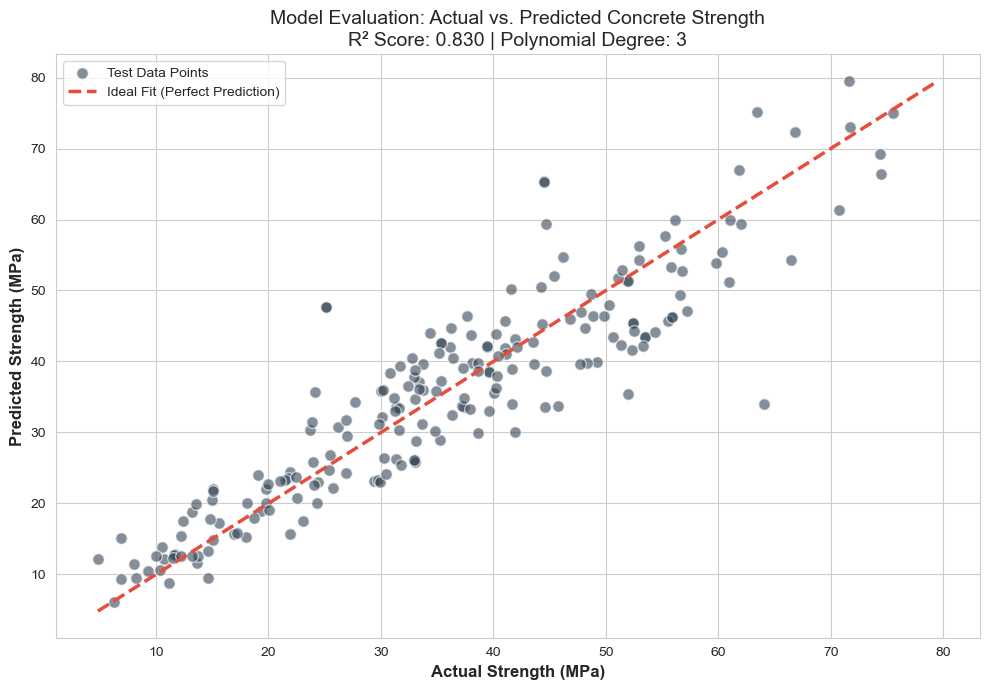

In [14]:
plt.figure(figsize=(10, 7))
sns.set_style("whitegrid") 
plt.scatter(y_test, y_pred, color="#334455", alpha=0.6, edgecolors='w', s=70, label='Test Data Points')

min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color='#e74c3c', linestyle='--', linewidth=2.5, label='Ideal Fit (Perfect Prediction)')

plt.xlabel('Actual Strength (MPa)', fontsize=12, fontweight='bold')
plt.ylabel('Predicted Strength (MPa)', fontsize=12, fontweight='bold')
plt.title(f'Model Evaluation: Actual vs. Predicted Concrete Strength\nR² Score: {r2:.3f} | Polynomial Degree: {grid.best_params_["polynomialfeatures__degree"]}', fontsize=14)

plt.legend(loc='upper left', frameon=True)
plt.tight_layout()

plt.show()
